#### Jupyter R notebook by Arvid Lundervold, 2016
in the project
### "Prediction of academic achievement in adolescents from teacher reports of inattention in childhood - a methodological pattern classification study"
by _Astri J. Lundervold, Tormod Bøe, Arvid Lundervold_


## Multinomial logistic regression

See e.g. http://www.ats.ucla.edu/stat/r/dae/mlogit.htm
and ml <- read.dta("http://www.ats.ucla.edu/stat/data/hsbdemo.dta")
Multinomial logistic regression is used to model nominal outcome variables,
in which the log odds of the outcomes are modeled as a linear combination 
of the predictor variables.
See also: Agresti_Foundations_of_Linear_and_Generalized_Linear_Models_Wiley_2015.pdf (Chap.6)

To report statistical results using R, e.g. MLR see
Andy Field et al.  Discovering Statistics Using R. Sage Publishing 2012.
http://studysites.uk.sagepub.com/dsur/main.htm and R code in
http://studysites.uk.sagepub.com/dsur/study/scriptfi.htm

Using deas from http://www.r-bloggers.com/fitting-a-neural-network-in-r-neuralnet-package
https://gist.github.com/mick001/49fad7f4c6112d954aff  neuralnetR.R

The original SPSS file as provided to AJL is 'inattention_Astri_94_96_new_grades_updated.sav'
and being edited and reduced by AJL to 'inattention_Arvid_new.sav'.

In [4]:
# Import data stored in the SPSS format
# library(memisc)
# fn <- "~/Dropbox/Arvid_Inattention/data2/inattention_Arvid_new.sav"
# data <- as.data.set(spss.system.file(fn))

Previous step is performed by __data_preparation.ipynb__ computing and storing 'inattention_nomiss_snap_is_012.csv' etc. read into this program.

In [5]:
D0 <- read.csv("~/Dropbox/Arvid_Inattention/data2/inattention_nomiss_2397x12.csv")
D1 <- read.csv("~/Dropbox/Arvid_Inattention/data2/inattention_nomiss_snap_is_012.csv")
D2 <- read.csv("~/Dropbox/Arvid_Inattention/data2/inattention_nomiss_snap_is_01.csv")
D3 <- read.csv("~/Dropbox/Arvid_Inattention/data2/inattention_nomiss_snap_is_01_outcome_is_low_medium_high.csv")
D4 <- read.csv("~/Dropbox/Arvid_Inattention/data2/inattention_nomiss_snap_is_01_outcome_is_123.csv")
data <- D4

#### Use Likert scale with three levels (not collapsing to two) 

APROPOS:
 - should actually be five (https://en.wikipedia.org/wiki/Likert_scale)

When responding to a Likert questionnaire item, respondents specify their level of agreement 
or disagreement on a symmetric agree-disagree scale for a series of statements. 
Thus, the range captures the intensity of their feelings for a given item.

The format of a typical five-level Likert item, for example, could be:
 * 1 Strongly disagree
 * 2 Disagree
 * 3 Neither agree nor disagree
 * 4 Agree
 * 5 Strongly agree

Likert scaling is a bipolar scaling method, measuring either positive or negative response to a statement.


In [6]:
for(i in 1:9){
  cmd = sprintf("data$snap%d <- D1$snap%d", i, i)
  # print(cmd)
  eval(parse(text=cmd))
}

#### Check that no datapoint is missing

In [7]:
apply(data,2,function(x) sum(is.na(x)))

gender      grade      snap1      snap2      snap3      snap4      snap5 
         0          0          0          0          0          0          0 
     snap6      snap7      snap8      snap9 averBinned 
         0          0          0          0          0

#### SIDESTEP: Randomly splitting the data into a train and a test set

In [8]:
index <- sample(1:nrow(data),round(0.75*nrow(data)))
train <- data[index,]
test <- data[-index,]

###  Fit a linear regression model and test it on the test set. 
> lm.fit <- glm(averBinned~., data=train)

> summary(lm.fit)

Before running our model. We then choose the level of our outcome that we wish 
to use as our baseline and specify this in the relevel function. 

Then, we run our model using multinom.

In [9]:
library(nnet)
data$AverageMarksLevel3 <- relevel(factor(data$averBinned), ref = "2")   # ref = "high"
test <- multinom(AverageMarksLevel3 ~ 
                   gender+grade +
                   snap1+snap2+snap3+snap4+snap5+snap6+snap7+snap8+snap9,
                   data = data)

# weights:  39 (24 variable)
initial  value 2633.373656 
iter  10 value 2518.603818
iter  20 value 2505.343951
iter  30 value 2505.055564
final  value 2505.054068 
converged


In [10]:
summary(test)

Call:
multinom(formula = AverageMarksLevel3 ~ gender + grade + snap1 + 
    snap2 + snap3 + snap4 + snap5 + snap6 + snap7 + snap8 + snap9, 
    data = data)

Coefficients:
  (Intercept)     gender      grade       snap1      snap2       snap3
1 -0.85501370  0.2256407 0.16494472  0.05488026  0.6489769 -0.02383838
3  0.07223822 -0.2620312 0.06289599 -0.52841367 -0.3073022 -0.10263580
        snap4       snap5      snap6      snap7      snap8       snap9
1 -0.16714559 -0.04084157  0.1725913 -0.1636895  0.2871769  0.06381004
3 -0.06131077  0.42519252 -0.4879066 -0.3584543 -0.3136770 -0.17760409

Std. Errors:
  (Intercept)    gender      grade     snap1     snap2     snap3     snap4
1   0.2034855 0.1056061 0.06567805 0.1374610 0.1940327 0.1950978 0.2399403
3   0.1941742 0.1039694 0.06437043 0.1836781 0.2810665 0.2518535 0.3285771
      snap5     snap6     snap7     snap8     snap9
1 0.2203130 0.2038670 0.2619213 0.1275080 0.1622366
3 0.2825674 0.2984448 0.4385224 0.1499846 0.2015068

Residu

In [11]:
z <- summary(test)$coefficients/summary(test)$standard.errors
# 2-tailed z test
p <- (1 - pnorm(abs(z), 0, 1)) * 2
p

,(Intercept),gender,grade,snap1,snap2,snap3,snap4,snap5,snap6,snap7,snap8,snap9
1,0.0000264753,0.0326285049,0.0120248910,0.6897146008,0.0008237812,0.9027510341,0.4860447980,0.8529311688,0.3972250004,0.5319993641,0.0243079335,0.6940870570
3,0.70987203,0.01172641,0.32852240,0.00401672,0.27424319,0.68362472,0.85197838,0.13238911,0.10208461,0.41369189,0.03649273,0.37811214


#### Extract the coefficients from the model and exponentiate

In [12]:
c <- exp(coef(test))

You can also use predicted probabilities to help you understand the model. 
Calculate predicted probabilities for each of the outcome levels using 
the fitted function. We can start by generating the predicted probabilities 
for the observations in our dataset and viewing the first few rows

In [13]:
head(pp <- fitted(test))

,2,1,3
1,0.3558110,0.2104557,0.4337333
2,0.3734630,0.2156931,0.4108439
3,0.3558110,0.2104557,0.4337333
4,0.3558110,0.2104557,0.4337333
5,0.3558110,0.2104557,0.4337333
6,0.3558110,0.2104557,0.4337333


#### Fore easy input to LaTeX:

In [14]:
library(stargazer)
stargazer(test)
stargazer(p)
stargazer(c)


Please cite as: 

 Hlavac, Marek (2015). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2. http://CRAN.R-project.org/package=stargazer 




% Table created by stargazer v.5.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sat, Jun 11, 2016 - 19:18:57
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & 1 & 3 \\ 
\\[-1.8ex] & (1) & (2)\\ 
\hline \\[-1.8ex] 
 gender & 0.226$^{**}$ & $-$0.262$^{**}$ \\ 
  & (0.106) & (0.104) \\ 
  & & \\ 
 grade & 0.165$^{**}$ & 0.063 \\ 
  & (0.066) & (0.064) \\ 
  & & \\ 
 snap1 & 0.055 & $-$0.528$^{***}$ \\ 
  & (0.137) & (0.184) \\ 
  & & \\ 
 snap2 & 0.649$^{***}$ & $-$0.307 \\ 
  & (0.194) & (0.281) \\ 
  & & \\ 
 snap3 & $-$0.024 & $-$0.103 \\ 
  & (0.195) & (0.252) \\ 
  & & \\ 
 snap4 & $-$0.167 & $-$0.061 \\ 
  & (0.240) & (0.329) \\ 
  & & \\ 
 snap5 & $-$0.041 & 0.425 \\ 
  & (0.220) & (0.283) \\ 
  & & \\ 
 snap6 & 0.173 & $-$0.488 \\ 
  & (0.204) & (0.298) \\ 
  & & \\ 
 sn

### Using an alternative implementation of MLR - mlogit

In [15]:
library(mlogit)

Loading required package: Formula
Loading required package: maxLik
Loading required package: miscTools

Please cite the 'maxLik' package as:
Henningsen, Arne and Toomet, Ott (2011). maxLik: A package for maximum likelihood estimation in R. Computational Statistics 26(3), 443-458. DOI 10.1007/s00180-010-0217-1.

If you have questions, suggestions, or comments regarding the 'maxLik' package, please use a forum or 'tracker' at maxLik's R-Forge site:
https://r-forge.r-project.org/projects/maxlik/


We need to modify the data so that the multinomial logistic regression
function can process it. To do this, we need to expand the outcome variable
(y) much like we would for dummy coding a categorical variable for
inclusion in standard multiple regression.

In [16]:
data1 <- data
data1$averBinned <- as.factor(data1$averBinned)
summary(data1)
data2 <- mlogit.data(data1, varying=NULL, choice="averBinned", shape="wide")

     gender          grade           snap1            snap2       
 Min.   :0.000   Min.   :2.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.000   Median :3.000   Median :0.0000   Median :0.0000  
 Mean   :0.476   Mean   :2.814   Mean   :0.1519   Mean   :0.1377  
 3rd Qu.:1.000   3rd Qu.:3.000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :1.000   Max.   :4.000   Max.   :2.0000   Max.   :2.0000  
     snap3             snap4             snap5             snap6        
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08803   Mean   :0.08177   Mean   :0.09929   Mean   :0.09762  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :2.00000   Max.   :2.00000   Max.   :2.00000   Max.   :2.00000  
     snap7          

In [17]:
head(data2)

,gender,grade,snap1,snap2,snap3,snap4,snap5,snap6,snap7,snap8,snap9,averBinned,AverageMarksLevel3,chid,alt
1.1,0,2,0,0,0,0,0,0,0,0,0,FALSE,3,1,1
1.2,0,2,0,0,0,0,0,0,0,0,0,FALSE,3,1,2
1.3,0,2,0,0,0,0,0,0,0,0,0,TRUE,3,1,3
2.1,0,2,0,0,1,0,0,0,0,0,0,TRUE,1,2,1
2.2,0,2,0,0,1,0,0,0,0,0,0,FALSE,1,2,2
2.3,0,2,0,0,1,0,0,0,0,0,0,FALSE,1,2,3


Now we can proceed with the multinomial logistic regression analysis using
the ‘mlogit’ function and the ubiquitous ‘summary’ function of the results.
Note that the reference category is specified as “high” (2, where the levels are 0,1,2).

In [18]:
model.1 <- mlogit(averBinned ~ 1 | gender+grade +
                    snap1+snap2+snap3+snap4+snap5+snap6+snap7+snap8+snap9,
                    data = data2,
                    reflevel="2")    # reflevel = "high")

In [19]:
summary(model.1)


Call:
mlogit(formula = averBinned ~ 1 | gender + grade + snap1 + snap2 + 
    snap3 + snap4 + snap5 + snap6 + snap7 + snap8 + snap9, data = data2, 
    reflevel = "2", method = "nr", print.level = 0)

Frequencies of alternatives:
      2       1       3 
0.34126 0.32499 0.33375 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 4.51E-07 
gradient close to zero 

Coefficients :
               Estimate Std. Error t-value  Pr(>|t|)    
1:(intercept) -0.855070   0.203485 -4.2021 2.644e-05 ***
3:(intercept)  0.072173   0.194175  0.3717 0.7101245    
1:gender       0.225644   0.105606  2.1367 0.0326256 *  
3:gender      -0.262022   0.103970 -2.5202 0.0117297 *  
1:grade        0.164967   0.065678  2.5118 0.0120133 *  
3:grade        0.062916   0.064371  0.9774 0.3283691    
1:snap1        0.054873   0.137460  0.3992 0.6897525    
3:snap1       -0.528499   0.183686 -2.8772 0.0040124 ** 
1:snap2        0.648952   0.194031  3.3446 0.0008241 ***
3:snap2       -0.307387   0.281080 -1.0936 0.274133

In [20]:
b <- exp(coef(model.1))
summary(b)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4253  0.7610  0.9503  0.9806  1.1010  1.9140 

In [21]:
names(data)

[1] "gender"             "grade"              "snap1"             
 [4] "snap2"              "snap3"              "snap4"             
 [7] "snap5"              "snap6"              "snap7"             
[10] "snap8"              "snap9"              "averBinned"        
[13] "AverageMarksLevel3"

In [22]:
head(data)

,gender,grade,snap1,snap2,snap3,snap4,snap5,snap6,snap7,snap8,snap9,averBinned,AverageMarksLevel3
1,0,2,0,0,0,0,0,0,0,0,0,3,3
2,0,2,0,0,1,0,0,0,0,0,0,1,1
3,0,2,0,0,0,0,0,0,0,0,0,2,2
4,0,2,0,0,0,0,0,0,0,0,0,2,2
5,0,2,0,0,0,0,0,0,0,0,0,2,2
6,0,2,0,0,0,0,0,0,0,0,0,2,2


Testing

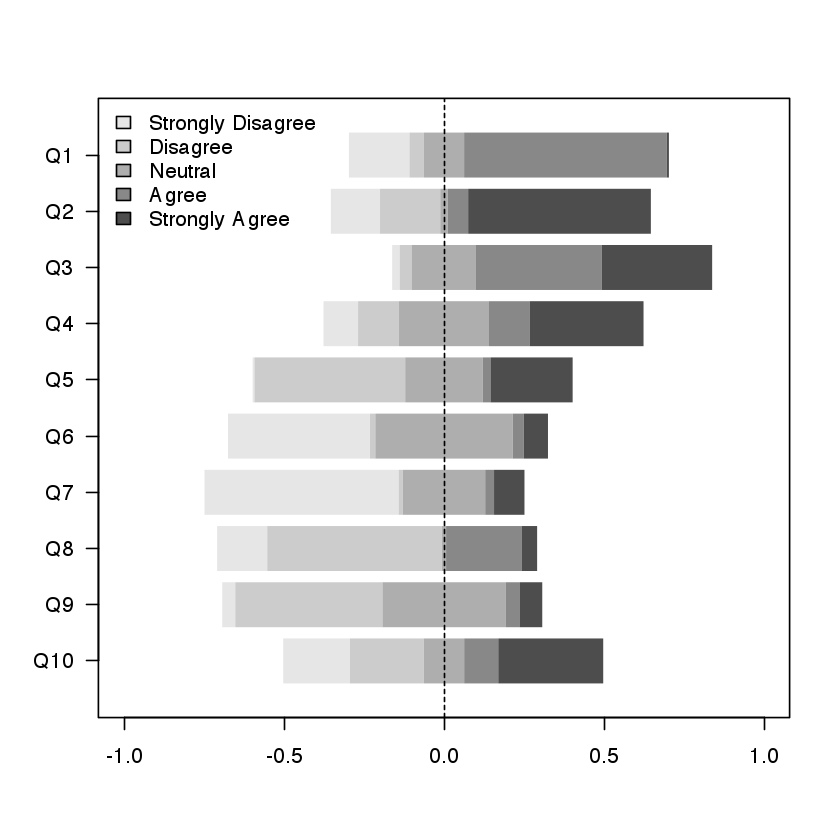

In [23]:
set.seed(40)
x <- matrix(rgamma(50,1,1),10,5)
x <- x/rowSums(x)
colnames(x) <- c("Strongly Disagree", "Disagree",
                 "Neutral", "Agree", "Strongly Agree")
rownames(x) <- paste0("Q", 1:nrow(x))


## colors for each category
clrs <- rev(gray.colors(ncol(x))) ## colors

## centering category
acat <- 3 ## "Neutral"

## separation between bars
sepr <- 0.2

## ncol and nrow
nr <- nrow(x)
nc <- ncol(x)

## reorder so that questions 1:nrow(x) go from top down
x <- x[nr:1,] 

## compute center offsets
cnof <- apply(x, 1, function(y) {
  lo <- if(acat > 1) sum(y[1:(acat-1)]) else 0
  hi <- sum(y[1:acat])
  lo + (hi-lo)/2
})

## create plot
plot(c(-1,1), c(1,nr), type="n",
     ylim=c(1-(1-sepr)/2-sepr,
            nr+(1-sepr)/2+sepr),
     ylab="", yaxt="n",
     xlab="", )

## plot bars
for(i in 1:nr) {
  for(j in 1:nc) {
    lo <- if(j > 1) sum(x[i,][1:(j-1)]) else 0
    hi <- sum(x[i,][1:j])
    polygon(x=c(lo, lo, hi, hi)-cnof[i],
            y=c(i-(1-sepr)/2, i+(1-sepr)/2,
                i+(1-sepr)/2, i-(1-sepr)/2),
            col=clrs[j], border=NA)
  }
}

## create y-axis
axis(2, at=1:nr, las=2, xpd=NA, labels=rownames(x)) 
legend("topleft", fill=clrs, bty="n", legend=colnames(x))

## add center line
abline(v=0, lty=2)


In [26]:
head(x)


,Strongly Disagree,Disagree,Neutral,Agree,Strongly Agree
Q10,0.2082850,0.2311013,0.1260881,0.1065782,0.3279473
Q9,0.04064632,0.45991199,0.38474905,0.04362408,0.07106856
Q8,0.15667175,0.54579887,0.01299913,0.23582576,0.04870449
Q7,0.60700022,0.01270126,0.25763510,0.02756255,0.09510087
Q6,0.44360933,0.01683174,0.42924049,0.03456616,0.07575228
Q5,0.005594751,0.471236163,0.242320574,0.024069861,0.256778650


In [27]:
x

,Strongly Disagree,Disagree,Neutral,Agree,Strongly Agree
Q10,0.2082850,0.2311013,0.1260881,0.1065782,0.3279473
Q9,0.04064632,0.45991199,0.38474905,0.04362408,0.07106856
Q8,0.15667175,0.54579887,0.01299913,0.23582576,0.04870449
Q7,0.60700022,0.01270126,0.25763510,0.02756255,0.09510087
Q6,0.44360933,0.01683174,0.42924049,0.03456616,0.07575228
Q5,0.005594751,0.471236163,0.242320574,0.024069861,0.256778650
Q4,0.1079143,0.1279794,0.2811541,0.1267584,0.3561937
Q3,0.02351776,0.03847138,0.20004444,0.39342948,0.34453695
Q2,0.15364919,0.18827816,0.02328442,0.06387391,0.57091432
Q1,0.189321709,0.044967766,0.125760017,0.633062163,0.006888345


In [28]:
matrix(rgamma(50,1,1),10,5)

1.7053920,0.2021273,0.7615568,0.2192562,0.6844458
0.1591546,0.1986496,3.3846383,0.9559229,0.4215130
0.7305412,0.2151153,0.2571816,0.4074093,0.4783926
1.7136237,0.5796253,2.2997209,0.5018369,3.8603597
0.05919675,3.62063747,1.53981994,1.13371166,0.01261060
0.5192955,1.4873522,0.1045275,1.2807758,0.6081882
1.7533553,1.5939005,2.2805781,0.8016385,1.0391847
0.5218780,0.5563637,0.4668945,0.7464735,1.6500413
2.4329936,0.7472875,1.2934711,0.2456427,2.8146218
2.8784054,1.1700794,0.8339679,0.2088622,0.9450346


In [31]:
length(data$snap1)

[1] 2397